In [1]:
import importlib

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from shapely.geometry import Polygon

import bento as bt


In [2]:
mpl.style.use("dark_background")

In [3]:
bt.ds.get_dataset_info()

,n_cells,n_genes,n_points,url,description
name,,,,,
merfish,1153.0,135.0,16907948.0,https://ndownloader.figshare.com/files/29046861,U2-OS cell line profiled with MERFISH
merfish_processed,1022.0,135.0,15315044.0,https://figshare.com/ndownloader/files/35596979,precomputed version of the U2-OS cell line pro...
seqfish,211.0,9506.0,5306521.0,https://ndownloader.figshare.com/files/29046873,3T3 cell line profiled with seqFISH+
seqfish_processed,179.0,3726.0,4680210.0,https://figshare.com/ndownloader/files/35596982,precomputed version of the 3T3 cell line profi...
cardio_control1,NaN,NaN,NaN,https://figshare.com/ndownloader/files/39850386,"vehicle replicate 1, iPSC-derived cardiomyocyt..."
cardio_control2,NaN,NaN,NaN,https://figshare.com/ndownloader/files/39850383,"vehicle replicate 2, iPSC-derived cardiomyocyt..."
cardio_dox1,NaN,NaN,NaN,https://figshare.com/ndownloader/files/39850470,"treatment replicate 1, doxorubicin-treated iPS..."
cardio_dox2,NaN,NaN,NaN,https://figshare.com/ndownloader/files/39850613,"treatment replicate 2, doxorubicin-treated iPS..."


In [30]:
adata = bt.ds.load_dataset('cardio_control2')

In [32]:
adata

AnnData object with n_obs × n_vars = 3664 × 100
    obs: 'cell_shape', 'nucleus_shape', 'cell_area'
    uns: 'points'

In [34]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)


In [35]:
bt.tl.analyze_shapes(adata, shape_names=["cell"], feature_names="area")


  0%|          | 0/1 [00:00<?, ?it/s]

Text(0, 0.5, 'n_genes_by_counts')

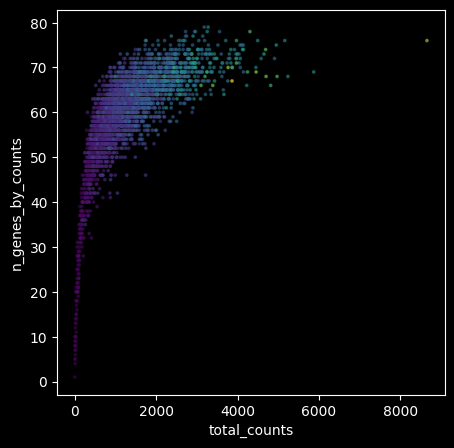

In [36]:
plt.figure(figsize=(5, 5))
plt.scatter(
    x=adata.obs["total_counts"],
    y=adata.obs["n_genes_by_counts"],
    c=adata.obs["cell_area"],
    s=3,
    alpha=0.5,
    cmap="viridis",
)
plt.xlabel("total_counts")
plt.ylabel("n_genes_by_counts")


In [37]:
adata.obs['batch'] = '0'
adata.uns['points']['batch'] = '0'

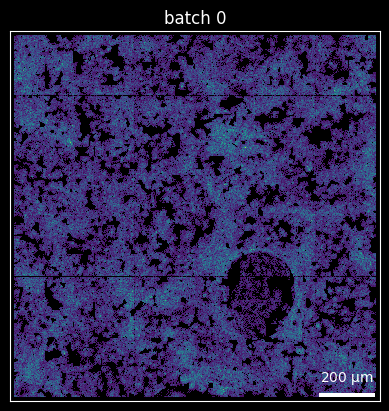

In [38]:
bt.pl.density(adata, shapes=[], binwidth=10, cmap='viridis')

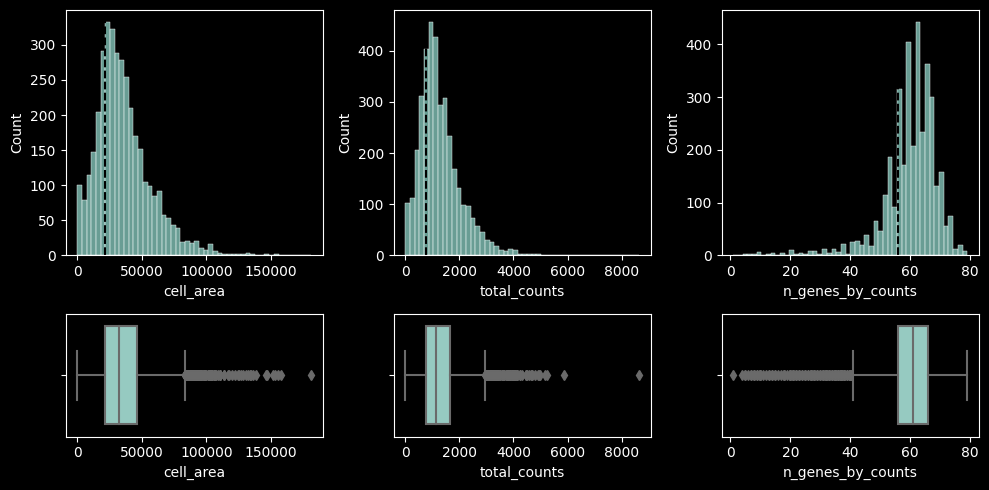

In [39]:
# Plot histogram of cell area, total counts, and n_genes_by_counts in subplots. Draw boxplots underneath each histogram.
fig, axes = plt.subplots(2, 3, figsize=(10, 5), gridspec_kw={"height_ratios": [2, 1]})

for i, (feature, ax) in enumerate(
    zip(["cell_area", "total_counts", "n_genes_by_counts"], axes[0])
):
    sns.histplot(adata.obs[feature], ax=ax, bins=50)
    ax.axvline(np.quantile(adata.obs[feature], 0.25), c="k", ls="--")

for i, (feature, ax) in enumerate(
    zip(["cell_area", "total_counts", "n_genes_by_counts"], axes[1])
):
    sns.boxplot(x=adata.obs[feature], ax=ax, orient="h")
    ax.set_xlabel(feature)

plt.tight_layout()


In [40]:
adata.obs['total_counts'].describe()

count    3664.000000
mean     1290.254150
std       773.735779
min         1.000000
25%       776.750000
50%      1131.000000
75%      1648.500000
max      8649.000000
Name: total_counts, dtype: float64